## UTS // Credit Card Dataset


In [1]:
!pip install --quiet annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set(style="whitegrid")

In [16]:
# Import dataset dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Load dataset dari file CSV
df = pd.read_csv('/content/drive/MyDrive/SEMESTER 5/ML/UCI_Credit_Card.csv')

print("Dataset berhasil di-load!")
print(f"Shape dataset: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset berhasil di-load!
Shape dataset: (30000, 25)
Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [18]:
#Lihat informasi dasar dataset
print("\n--- INFO DATASET ---")
df.info()

print("\n--- STATISTIK DESKRIPTIF ---")
display(df.describe())

print("\n--- CEK NILAI KOSONG ---")
print(df.isna().sum())



--- INFO DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000



--- CEK NILAI KOSONG ---
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [27]:
# Hapus kolom yang tidak diperlukan
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])
if 'default.payment.next.month' in df.columns:
    df = df.drop(columns=['default.payment.next.month'])


In [28]:
# tangani misiing value
df = df.fillna(df.median(numeric_only=True))
print("Missing values ditangani (jika ada).")

Missing values ditangani (jika ada).


In [29]:
#Membuat fitur baru

bill_cols = [c for c in df.columns if "BILL_AMT" in c]
pay_cols = [c for c in df.columns if "PAY_AMT" in c]

df['Total_Bill'] = df[bill_cols].sum(axis=1)
df['Total_Pay'] = df[pay_cols].sum(axis=1)
df['Bill_to_Limit'] = df['Total_Bill'] / (df['LIMIT_BAL'] + 1)
df['Pay_Ratio'] = df['Total_Pay'] / (df['Total_Bill'] + 1)

print(" Fitur baru berhasil dibuat!")
display(df[['Total_Bill', 'Total_Pay', 'Bill_to_Limit', 'Pay_Ratio']].head())


 Fitur baru berhasil dibuat!


,Total_Bill,Total_Pay,Bill_to_Limit,Pay_Ratio
0,7704.0,689.0,0.385181,0.089422
1,17077.0,5000.0,0.142307,0.292774
2,101653.0,11018.0,1.129465,0.108387
3,231334.0,8388.0,4.626587,0.036259
4,109339.0,59049.0,2.186736,0.540049


In [30]:
# Normalisasi semua fitur numerik

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print(" Data berhasil dinormalisasi! Shape:", X_scaled.shape)


 Data berhasil dinormalisasi! Shape: (30000, 27)


In [25]:
#KMeans clustering (mencari k terbaik)

sil_scores = {}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil

best_k = max(sil_scores, key=sil_scores.get)
print("Silhouette Score per k:", sil_scores)
print(" K terbaik:", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)


Silhouette Score per k: {2: np.float64(0.3565260918456261), 3: np.float64(0.19322267713552832), 4: np.float64(0.2001836484010817), 5: np.float64(0.17698233783822404), 6: np.float64(0.1686345270224814), 7: np.float64(0.16958913367491493)}
 K terbaik: 2


In [26]:
# DBSCAN clustering (cari parameter terbaik)
eps_values = [0.5, 0.7, 0.9, 1.1]
min_samples_values = [5, 10, 20]

best_sil_db = -1
best_params = None

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters >= 2:
            sil = silhouette_score(X_scaled, labels)
            if sil > best_sil_db:
                best_sil_db = sil
                best_params = (eps, ms)
                labels_dbscan = labels

print(f" DBSCAN terbaik: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Silhouette DBSCAN terbaik: {best_sil_db:.4f}")


 DBSCAN terbaik: eps=1.1, min_samples=20
Silhouette DBSCAN terbaik: -0.2645


In [38]:
# Evaluasi hasil clustering
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
dbi_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)
sil_dbscan = silhouette_score(X_scaled, labels_dbscan)
dbi_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)

print("\n===  Evaluasi Clustering ===")
print(f"KMeans -> Silhouette: {sil_kmeans:.4f}, DBI: {dbi_kmeans:.4f}")
print(f"DBSCAN -> Silhouette: {sil_dbscan:.4f}, DBI: {dbi_dbscan:.4f}")



===  Evaluasi Clustering ===
KMeans -> Silhouette: 0.3565, DBI: 1.4868
DBSCAN -> Silhouette: -0.2645, DBI: 1.9936


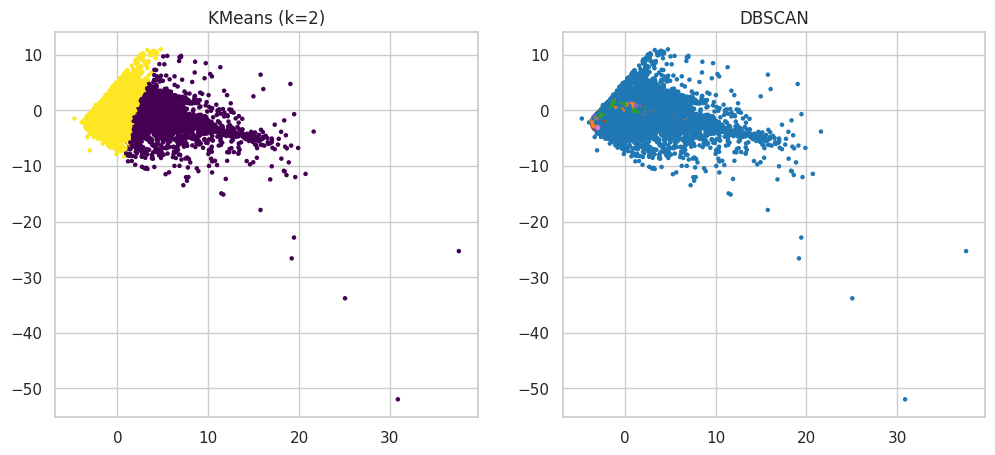

In [33]:
# Visualisasi clustering dalam bentuk PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=5)
plt.title(f'KMeans (k={best_k})')

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='tab10', s=5)
plt.title('DBSCAN')
plt.show()


In [37]:
#Implementasi ANN Annoy
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

for i in range(X_scaled.shape[0]):
    ann.add_item(i, X_scaled[i].astype(np.float32))
ann.build(10)

random.seed(42)
query_indices = random.sample(range(X_scaled.shape[0]), 5)

print("===  Hasil Annoy ===")
for qi in query_indices:
    neighbors, distances = ann.get_nns_by_item(qi, 6, include_distances=True)
    print(f"\nQuery Index: {qi}")
    for n, d in zip(neighbors, distances):
        print(f"Neighbor: {n} | Distance: {d:.4f} | KMeans: {labels_kmeans[n]} | DBSCAN: {labels_dbscan[n]}")


===  Hasil Annoy ===

Query Index: 20952
Neighbor: 20952 | Distance: 0.0000 | KMeans: 1 | DBSCAN: 5
Neighbor: 21162 | Distance: 0.4051 | KMeans: 1 | DBSCAN: 5
Neighbor: 27023 | Distance: 0.4988 | KMeans: 1 | DBSCAN: 5
Neighbor: 20933 | Distance: 0.5242 | KMeans: 1 | DBSCAN: 5
Neighbor: 9796 | Distance: 0.5759 | KMeans: 1 | DBSCAN: 5
Neighbor: 14221 | Distance: 0.5850 | KMeans: 1 | DBSCAN: 5

Query Index: 3648
Neighbor: 3648 | Distance: 0.0000 | KMeans: 1 | DBSCAN: -1
Neighbor: 19243 | Distance: 3.1995 | KMeans: 1 | DBSCAN: -1
Neighbor: 26188 | Distance: 3.3735 | KMeans: 1 | DBSCAN: -1
Neighbor: 3329 | Distance: 3.6451 | KMeans: 1 | DBSCAN: -1
Neighbor: 19401 | Distance: 3.7112 | KMeans: 1 | DBSCAN: -1
Neighbor: 7060 | Distance: 3.8263 | KMeans: 1 | DBSCAN: -1

Query Index: 819
Neighbor: 819 | Distance: 0.0000 | KMeans: 1 | DBSCAN: -1
Neighbor: 23962 | Distance: 0.9645 | KMeans: 1 | DBSCAN: 2
Neighbor: 2225 | Distance: 1.2179 | KMeans: 1 | DBSCAN: -1
Neighbor: 11231 | Distance: 1.2241 |

In [36]:
#Simpan hasil clustering ke file CSV
out = pd.DataFrame({
    'Index': np.arange(len(labels_kmeans)),
    'KMeans_Cluster': labels_kmeans,
    'DBSCAN_Cluster': labels_dbscan
})
out.to_csv('/content/cluster_labels.csv', index=False)
print(" Hasil disimpan sebagai cluster_labels.csv")


 Hasil disimpan sebagai cluster_labels.csv
